In [1]:
import os
os.chdir('/home/rn7823/fl_lab/centralized_cifar_10')
os.getcwd()

'/home/rn7823/fl_lab/centralized_cifar_10'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# No GA
df_0 = pd.read_csv('artifacts/cnn_2024-09-07-02-03_19200225.csv')
df_0

,Round,train_losses,test_losses,accuracies,gradients
0,1,2.301806,0.002292,16.09,0.337608
1,2,2.283276,0.002283,10.00,0.341788
2,3,2.303868,0.002265,10.33,0.630486
3,4,2.252051,0.002252,14.96,0.369939
4,5,2.242561,0.002230,18.82,0.543078
...,...,...,...,...,...
3905,3906,0.334961,0.001045,70.37,3.922736
3906,3907,0.288692,0.001033,70.56,3.409690
3907,3908,0.251597,0.001036,70.29,2.988136
3908,3909,0.209012,0.001062,69.88,2.099792


In [5]:
# q = 1
df_1 = pd.read_csv('artifacts/cnn_19202113.csv')
df_1

,Round,train_losses,test_losses,accuracies,gradients
0,1,2.303677,0.002294,14.90,0.277605
1,2,2.289088,0.002283,10.00,0.272781
2,3,2.285799,0.002270,11.65,0.396380
3,4,2.255481,0.002256,16.16,0.314009
4,5,2.243328,0.002232,21.84,0.503901
...,...,...,...,...,...
3905,3906,1.460068,0.001525,44.99,2.735515
3906,3907,1.584247,0.001521,45.10,3.701297
3907,3908,1.373364,0.001516,45.34,2.880300
3908,3909,1.575073,0.001511,45.64,3.747339


In [6]:
# q = 10
df_2 = pd.read_csv('artifacts/cnn_19201652.csv')
df_2

,Round,train_losses,test_losses,accuracies,gradients
0,1,2.297006,0.002304,11.82,0.353530
1,2,2.292825,0.002286,10.00,0.465760
2,3,2.309413,0.002261,15.10,0.697447
3,4,2.251864,0.002248,17.26,0.398587
4,5,2.231597,0.002227,19.62,0.545086
...,...,...,...,...,...
3794,3795,0.901926,0.001055,63.39,2.450720
3795,3796,0.866377,0.001058,62.99,2.721397
3796,3797,1.031444,0.001070,62.59,2.375776
3797,3798,0.992184,0.001077,62.07,2.379968


In [7]:
# q = 100
df_3 = pd.read_csv('artifacts/cnn_19202115.csv')
df_3

,Round,train_losses,test_losses,accuracies,gradients
0,1,2.299978,0.002295,12.91,0.330053
1,2,2.286359,0.002278,10.01,0.385304
2,3,2.261446,0.002267,16.52,0.556224
3,4,2.240785,0.002263,15.65,0.391834
4,5,2.240866,0.002241,14.83,0.703827
...,...,...,...,...,...
3905,3906,0.740462,0.001144,69.44,4.903243
3906,3907,0.525572,0.001110,69.76,3.689494
3907,3908,0.503902,0.001079,69.92,3.491527
3908,3909,0.596056,0.001037,70.14,5.304566


In [8]:
df = pd.concat([df_0.Round, df_0.accuracies, df_1.accuracies, df_2.accuracies, df_3.accuracies], axis=1)
df.columns = ['Round', 'No GA', 'q=1', 'q=10', 'q=100']
df.head()

,Round,No GA,q=1,q=10,q=100
0,1,16.09,14.90,11.82,12.91
1,2,10.00,10.00,10.00,10.01
2,3,10.33,11.65,15.10,16.52
3,4,14.96,16.16,17.26,15.65
4,5,18.82,21.84,19.62,14.83


In [9]:
df_sampled = df[df.index % 400 == 0]

In [10]:
# Melt DataFrame for seaborn
df_melted = df_sampled.melt(id_vars='Round', var_name='Method', value_name='Value')
df_melted.head()

,Round,Method,Value
0,1,No GA,16.09
1,401,No GA,57.84
2,801,No GA,63.44
3,1201,No GA,68.65
4,1601,No GA,69.27


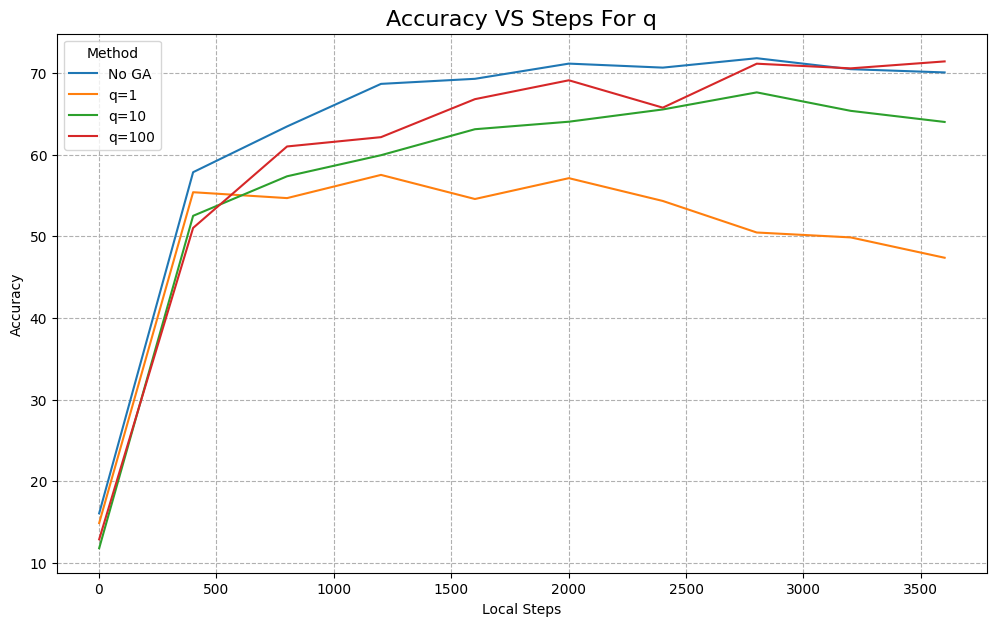

In [13]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_melted, x='Round', 
             y='Value', 
             hue='Method', 
            #  marker='o'
             )

plt.title('Accuracy VS Steps For q', fontsize=16)
plt.xlabel('Local Steps')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--')

plt.show()